In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import argparse
import torch
from tqdm import tqdm
import data_loader.data_loaders as module_data
import model.loss as module_loss
import model.metric as module_metric
import model.model as module_arch
from trainer import Trainer
from utils import Logger
import importlib
print("Modules loaded")

importlib.reload(module_data) #load recent changes to data_loaders.py
importlib.reload(module_arch)
print("Reload complete")

Modules loaded
Reload complete


In [76]:
#This function gets the parameters from the config.json file 
def get_instance(module, name, config, *args):
    return getattr(module, config[name]['type'])(*args, **config[name]['args'])

def main(config, resume):
    train_logger = Logger() #uses entries to store training performance metrics

    # setup data_loader instances
    data_loader = get_instance(module_data, 'data_loader', config) #looks in data_loader/data_loaders.py for 'MNISTDataLoader'
    #print(os.path.isfile(data_loader.dataset))
    valid_data_loader = data_loader.split_validation() #allocate some images as validation

    # build model architecture
    model = get_instance(module_arch, 'arch', config) #looks in the model/model.py for 'MnistModel', as specified by config
    print(model)
    print(torch.cuda.get_device_name(0))

    # get function handles of loss and metrics
    loss = getattr(module_loss, config['loss']) #looks in model/loss.py for 'nll_loss'
    metrics = [getattr(module_metric, met) for met in config['metrics']] #get all the metrics in model/metrics.py - default is accuracy and top 3 accuracy

    # build optimizer, learning rate scheduler. delete every lines containing lr_scheduler for disabling scheduler
    trainable_params = filter(lambda p: p.requires_grad, model.parameters()) #Number of training params
    optimizer = get_instance(torch.optim, 'optimizer', config, trainable_params)
    lr_scheduler = get_instance(torch.optim.lr_scheduler, 'lr_scheduler', config, optimizer)

    trainer = Trainer(model, loss, metrics, optimizer,
                      resume=resume, #choose a previous epoch to start training from
                      config=config,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=lr_scheduler,
                      train_logger=train_logger)

    trainer.train()



In [77]:
config_file = 'config3.json'
# load config file
with open(config_file) as handle:
    config = json.load(handle)
# setting path to save trained models and log files
path = os.path.join(config['trainer']['save_dir'], config['name'])

In [78]:
#Train the network
main(config, None)

Cifar10Model(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Trainable parameters: 62006
Tesla K80


Train Epoch: 1 [0/9000 (0%)] Loss: -0.027691
Train Epoch: 1 [512/9000 (6%)] Loss: -0.490261
Train Epoch: 1 [1024/9000 (11%)] Loss: -5.999186
Train Epoch: 1 [1536/9000 (17%)] Loss: -43.589203
Train Epoch: 1 [2048/9000 (23%)] Loss: -215.833923
Train Epoch: 1 [2560/9000 (28%)] Loss: -953.905396
Train Epoch: 1 [3072/9000 (34%)] Loss: -3395.058838
Train Epoch: 1 [3584/9000 (40%)] Loss: -9236.504883
Train Epoch: 1 [4096/9000 (45%)] Loss: -24874.650391
Train Epoch: 1 [4608/9000 (51%)] Loss: -53370.742188
Train Epoch: 1 [5120/9000 (57%)] Loss: -110174.554688
Train Epoch: 1 [5632/9000 (62%)] Loss: -207546.828125
Train Epoch: 1 [6144/9000 (68%)] Loss: -427288.250000
Train Epoch: 1 [6656/9000 (74%)] Loss: -709067.250000
Train Epoch: 1 [7168/9000 (79%)] Loss: -1211760.125000
Train Epoch: 1 [7680/9000 (85%)] Loss: -2007150.750000
Train Epoch: 1 [8192/9000 (91%)] Loss: -3266183.250000
Train Epoch: 1 [8704/9000 (96%)] Loss: -4613161.500000
    epoch          : 1
    val_loss       : -6353523.375
    

Saving checkpoint: saved/cifar_fromTAR/0520_203356/checkpoint-epoch6.pth ...
Saving current best: model_best.pth ...
Train Epoch: 7 [0/9000 (0%)] Loss: -249868943360.000000
Train Epoch: 7 [512/9000 (6%)] Loss: -266312876032.000000
Train Epoch: 7 [1024/9000 (11%)] Loss: -289906098176.000000
Train Epoch: 7 [1536/9000 (17%)] Loss: -297880977408.000000
Train Epoch: 7 [2048/9000 (23%)] Loss: -297840214016.000000
Train Epoch: 7 [2560/9000 (28%)] Loss: -325955584000.000000
Train Epoch: 7 [3072/9000 (34%)] Loss: -341188182016.000000
Train Epoch: 7 [3584/9000 (40%)] Loss: -361980919808.000000
Train Epoch: 7 [4096/9000 (45%)] Loss: -364418531328.000000
Train Epoch: 7 [4608/9000 (51%)] Loss: -391261487104.000000
Train Epoch: 7 [5120/9000 (57%)] Loss: -425805676544.000000
Train Epoch: 7 [5632/9000 (62%)] Loss: -417161576448.000000
Train Epoch: 7 [6144/9000 (68%)] Loss: -437623226368.000000
Train Epoch: 7 [6656/9000 (74%)] Loss: -432547168256.000000
Train Epoch: 7 [7168/9000 (79%)] Loss: -470510305

Train Epoch: 12 [6656/9000 (74%)] Loss: -6190223327232.000000
Train Epoch: 12 [7168/9000 (79%)] Loss: -6494492819456.000000
Train Epoch: 12 [7680/9000 (85%)] Loss: -6988948307968.000000
Train Epoch: 12 [8192/9000 (91%)] Loss: -6131816071168.000000
Train Epoch: 12 [8704/9000 (96%)] Loss: -6441577480192.000000
    epoch          : 12
    val_loss       : -6939649933312.0
    my_metric2     : 0.3017065602836879
    val_my_metric  : 0.095703125
    loss           : -5672633723678.865
    val_my_metric2 : 0.305859375
    my_metric      : 0.0936613475177305
Saving checkpoint: saved/cifar_fromTAR/0520_203356/checkpoint-epoch12.pth ...
Saving current best: model_best.pth ...
Train Epoch: 13 [0/9000 (0%)] Loss: -7009710112768.000000
Train Epoch: 13 [512/9000 (6%)] Loss: -7523986833408.000000
Train Epoch: 13 [1024/9000 (11%)] Loss: -7395336519680.000000
Train Epoch: 13 [1536/9000 (17%)] Loss: -7370180132864.000000
Train Epoch: 13 [2048/9000 (23%)] Loss: -7636367441920.000000
Train Epoch: 13 [256

Train Epoch: 18 [512/9000 (6%)] Loss: -30517604909056.000000
Train Epoch: 18 [1024/9000 (11%)] Loss: -34849761001472.000000
Train Epoch: 18 [1536/9000 (17%)] Loss: -33101344407552.000000
Train Epoch: 18 [2048/9000 (23%)] Loss: -36484455333888.000000
Train Epoch: 18 [2560/9000 (28%)] Loss: -33867574542336.000000
Train Epoch: 18 [3072/9000 (34%)] Loss: -34774236266496.000000
Train Epoch: 18 [3584/9000 (40%)] Loss: -34055244480512.000000
Train Epoch: 18 [4096/9000 (45%)] Loss: -37058605219840.000000
Train Epoch: 18 [4608/9000 (51%)] Loss: -36079268790272.000000
Train Epoch: 18 [5120/9000 (57%)] Loss: -37318765314048.000000
Train Epoch: 18 [5632/9000 (62%)] Loss: -37169724915712.000000
Train Epoch: 18 [6144/9000 (68%)] Loss: -38747684995072.000000
Train Epoch: 18 [6656/9000 (74%)] Loss: -34502952878080.000000
Train Epoch: 18 [7168/9000 (79%)] Loss: -37441549369344.000000
Train Epoch: 18 [7680/9000 (85%)] Loss: -38403420717056.000000
Train Epoch: 18 [8192/9000 (91%)] Loss: -38748926509056.0

Train Epoch: 23 [6656/9000 (74%)] Loss: -101261496025088.000000
Train Epoch: 23 [7168/9000 (79%)] Loss: -100680475869184.000000
Train Epoch: 23 [7680/9000 (85%)] Loss: -100268989480960.000000
Train Epoch: 23 [8192/9000 (91%)] Loss: -111954538528768.000000
Train Epoch: 23 [8704/9000 (96%)] Loss: -113979623997440.000000
    epoch          : 23
    val_loss       : -110585902530560.0
    my_metric2     : 0.2995345744680851
    val_my_metric  : 0.0951171875
    loss           : -99866907376734.4
    val_my_metric2 : 0.305859375
    my_metric      : 0.09773936170212766
Saving checkpoint: saved/cifar_fromTAR/0520_203356/checkpoint-epoch23.pth ...
Saving current best: model_best.pth ...
Train Epoch: 24 [0/9000 (0%)] Loss: -102515827802112.000000
Train Epoch: 24 [512/9000 (6%)] Loss: -109581191610368.000000
Train Epoch: 24 [1024/9000 (11%)] Loss: -107163158577152.000000
Train Epoch: 24 [1536/9000 (17%)] Loss: -116945290526720.000000
Train Epoch: 24 [2048/9000 (23%)] Loss: -114697621733376.0000

Saving current best: model_best.pth ...
Train Epoch: 29 [0/9000 (0%)] Loss: -233723681308672.000000
Train Epoch: 29 [512/9000 (6%)] Loss: -245377202651136.000000
Train Epoch: 29 [1024/9000 (11%)] Loss: -237773533478912.000000
Train Epoch: 29 [1536/9000 (17%)] Loss: -245484157403136.000000
Train Epoch: 29 [2048/9000 (23%)] Loss: -248031274336256.000000
Train Epoch: 29 [2560/9000 (28%)] Loss: -241750102769664.000000
Train Epoch: 29 [3072/9000 (34%)] Loss: -249440493371392.000000
Train Epoch: 29 [3584/9000 (40%)] Loss: -247005767008256.000000
Train Epoch: 29 [4096/9000 (45%)] Loss: -249384994340864.000000
Train Epoch: 29 [4608/9000 (51%)] Loss: -255518392188928.000000
Train Epoch: 29 [5120/9000 (57%)] Loss: -265641915318272.000000
Train Epoch: 29 [5632/9000 (62%)] Loss: -272431805628416.000000
Train Epoch: 29 [6144/9000 (68%)] Loss: -248535899439104.000000
Train Epoch: 29 [6656/9000 (74%)] Loss: -269506547023872.000000
Train Epoch: 29 [7168/9000 (79%)] Loss: -266316208406528.000000
Train 

In [118]:
def main2(config, resume):
    # setup data_loader instances
    data_loader = getattr(module_data, config['data_loader']['type'])(
        config['data_loader']['args']['data_dir'],
        batch_size=512,
        shuffle=False,
        validation_split=0.0,
        training=False,
        num_workers=2
    )
    
    # build model architecture
    model = get_instance(module_arch, 'arch', config)
    print(model)
    print(torch.cuda.get_device_name(0))


    
    # get function handles of loss and metrics
    loss_fn = getattr(module_loss, config['loss'])
    metric_fns = [getattr(module_metric, met) for met in config['metrics']]
    
    # load state dict
    checkpoint = torch.load(resume)
    state_dict = checkpoint['state_dict'] #dictionary of model parameters from saved file
    if config['n_gpu'] > 1:
        model = torch.nn.DataParallel(model)
    model.load_state_dict(state_dict) 
    
    # prepare model for testing
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval() #tells model to ignore dropout and batch normalization
    
    total_loss = 0.0
    total_metrics = torch.zeros(len(metric_fns))
    
    classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
    with torch.no_grad(): #speed up calculations, unable to perform back propogation
        for i, (data, target) in enumerate(tqdm(data_loader)): #tqdm is a progress bar
            data, target = data.to(device), target.to(device)
            output = model(data)
            #
            # save sample images, or do something with output here
            #
            
            
            if i < 5:
                fig = plt.figure()
                output_cpu = output.to(torch.device("cpu"))
                target_cpu = target.to(torch.device("cpu"))
                idx = (np.argmax(output_cpu[1], axis=0))
                cls = classes[idx]
                plt.title("Prediction = " + str(cls) + " | Actual = " + str(classes[target_cpu[1].numpy()]) )
                data_cpu = data.to(torch.device("cpu"))
                img = data_cpu[1]
                print(data_cpu.shape)
                plt.imshow(np.transpose(np.reshape(img,(3, 32,32)), (1,2,0))/2+0.5) #un-normalize and realign
                
            # computing loss, metrics on test set
            loss = loss_fn(output, target)
            batch_size = data.shape[0]
            total_loss += loss.item() * batch_size
            for i, metric in enumerate(metric_fns):
                total_metrics[i] += metric(output, target) * batch_size
        
        plt.show()
                      
    n_samples = len(data_loader.sampler)
    print("num samples = " + str(n_samples))
    log = {'loss': total_loss / n_samples}
    log.update({met.__name__: total_metrics[i].item() / n_samples for i, met in enumerate(metric_fns)})
    print(log)
    print("My_metric is accuracy, my_metric2 is top-3 accuracy")

In [119]:
resume = "saved/cifar_fromTAR/0520_203356/model_best.pth"

print(os.path.isdir("saved/cifar_fromTAR/0520_203356"))
print(os.path.exists(resume))

#config = torch.load("saved/Mnist_LeNet/0414_203632/config.json")
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

True
True


  0%|          | 0/20 [00:00<?, ?it/s]

Cifar10Model(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Trainable parameters: 62006
Tesla K80


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  5%|▌         | 1/20 [00:00<00:05,  3.69it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
 15%|█▌        | 3/20 [00:00<00:03,  4.68it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
 25%|██▌       | 5/20 [00:00<00:02,  5.75it/s]

torch.Size([512, 3, 32, 32])
torch.Size([512, 3, 32, 32])


100%|██████████| 20/20 [00:01<00:00, 12.47it/s]


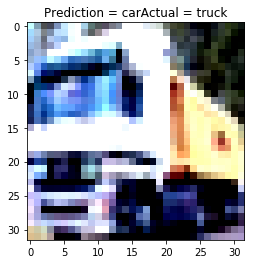

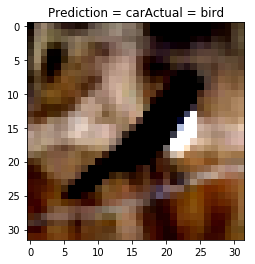

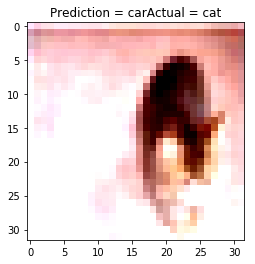

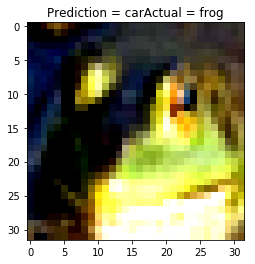

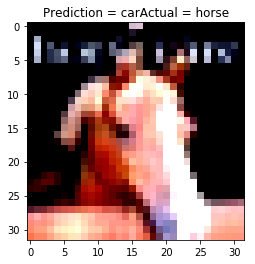

num samples = 10000
{'loss': -314659231546055.06, 'my_metric2': 0.3022, 'my_metric': 0.0974}
My_metric is accuracy, my_metric2 is top-3 accuracy


In [120]:
#Test
main2(config, resume)